In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

import os, sys

project_root = '/user_data/mmhender/featsynth/'
# sys.path.append(os.path.join(project_root, 'code'))
sys.path.insert(0, os.path.join(project_root, 'code'))
from utils import stats_utils, plot_utils
from behav_analysis import analyze_expt1, analyze_expt2

In [4]:
super_names, super_cbinds, basic_names, basic_inds, \
        super_names_long, super_inds_long, n_basic, n_super, n_basic_each_super = \
            analyze_expt1.get_categ_info()

trial_data_all1, subjects1, subject_cb1, cue_level_names, image_type_names = analyze_expt1.load_data()
trial_data_all2, subjects2, subject_cb2, cue_level_names, image_type_names = analyze_expt2.load_data()
 
n_subjects1 = len(subjects1)
n_subjects2 = len(subjects2)

n_cue_levels = len(cue_level_names)
n_image_types = len(image_type_names)

acc_by_condition1, dprime_by_condition1, propyes_by_condition1, rt_by_condition1 = analyze_expt1.get_perf_by_cond()
acc_by_condition2, dprime_by_condition2, propyes_by_condition2, rt_by_condition2 = analyze_expt2.get_perf_by_cond()


In [12]:
cue_level_colors = np.array([[93,192,219], [44,92,168]])/255
point_types = ['o','x']
markersize = 4;
xjitters = np.array([-0.2, 0.2])
barwidth = xjitters[1]*2

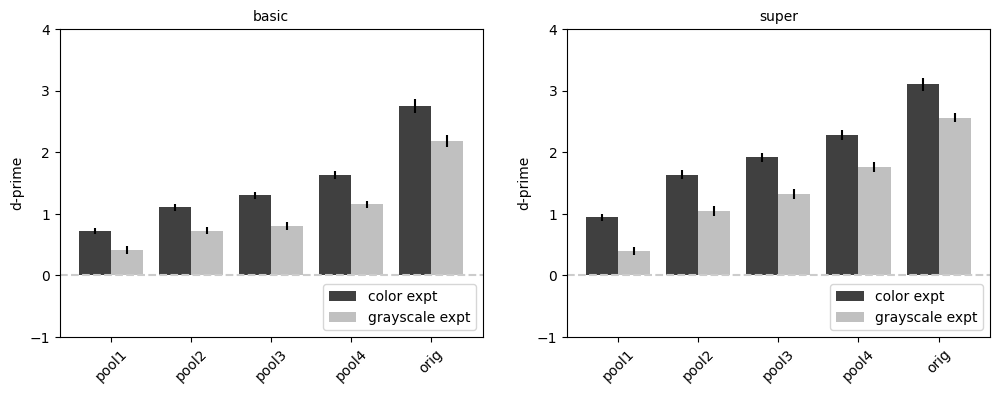

In [16]:
color_cond_colors = cm.gray(np.linspace(0,1,5))[[1,3],:]

plot_utils.set_all_font_sizes(10)

plt.figure(figsize=(12,4))

for cc, cue in enumerate(cue_level_names):

    
    ax = plt.subplot(1,2,cc+1)
    lh = []

    for ee, [ename, dvals, svals] in enumerate(zip(['color expt','grayscale expt'], \
                                               [dprime_by_condition1, dprime_by_condition2], \
                                               [subject_cb1, subject_cb2])):


        vals = dvals[:,cc,:]
        n_subs_plot = vals.shape[0]

        meanvals = np.mean(vals, axis=0)
        semvals = np.std(vals, axis=0)/np.sqrt(n_subs_plot)

        h = plt.bar(np.arange(n_image_types)+xjitters[ee], \
                meanvals, \
                color = color_cond_colors[ee,:], width=barwidth)
        plt.errorbar(np.arange(n_image_types)+xjitters[ee], \
                         meanvals, \
                         semvals, \
                         color = 'k', linestyle='none')
                        # color = color_cond_colors[ee,:])
        lh.append(h)

        plt.xticks(np.arange(n_image_types), image_type_names,rotation=45)


    plt.axhline(0, color=[0.8, 0.8, 0.8], linestyle='--')

    ax.legend(lh, ['color expt','grayscale expt'], loc='lower right')

    plt.ylabel('d-prime')

    plt.ylim([-1, 4])

    plt.title('%s'%(cue_level_names[cc]))
    

In [17]:
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols


In [18]:
var1, var2, var3 = 'cue_level','image_type','color_cond'
model_str = 'value ~ C(%s) + C(%s) + C(%s)'%(var1, var2, var3)
model_str += ' + C(%s):C(%s)'%(var1, var2)
model_str += ' + C(%s):C(%s)'%(var1, var3)
model_str += ' + C(%s):C(%s)'%(var2, var3)
model_str += ' + C(%s):C(%s):C(%s)'%(var1, var2, var3)
model_str += ' + 1'
model_str

'value ~ C(cue_level) + C(image_type) + C(color_cond) + C(cue_level):C(image_type) + C(cue_level):C(color_cond) + C(image_type):C(color_cond) + C(cue_level):C(image_type):C(color_cond) + 1'

In [19]:
atab = []

for ee, [ename, dvals, svals] in enumerate(zip(['color expt','grayscale expt'], \
                                           [dprime_by_condition1, dprime_by_condition2], \
                                           [subject_cb1, subject_cb2])):

    vals = dvals[:,:,:]

    for cc in range(n_cue_levels):
        for ii in range(n_image_types):
            for ss in range(vals.shape[0]):

                # [cue level, image type, color cond, value]
                atab.append([cc,ii,ee,vals[ss,cc,ii]])

df = pd.DataFrame(np.array(atab), columns=[var1, var2, var3,'value'])

model = ols(model_str, data = df).fit()

anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(cue_level),1.0,38.207240,38.207240,152.084755,3.311954e-32
C(image_type),4.0,395.798148,98.949537,393.870794,4.511267e-190
C(color_cond),1.0,52.926689,52.926689,210.675841,1.043698e-42
C(cue_level):C(image_type),4.0,6.929570,1.732392,6.895826,1.838780e-05
C(cue_level):C(color_cond),1.0,0.664287,0.664287,2.644209,1.043075e-01
C(image_type):C(color_cond),4.0,0.495154,0.123788,0.492743,7.410923e-01
C(cue_level):C(image_type):C(color_cond),4.0,0.536141,0.134035,0.533530,7.111384e-01
Residual,830.0,208.515374,0.251223,NaN,NaN


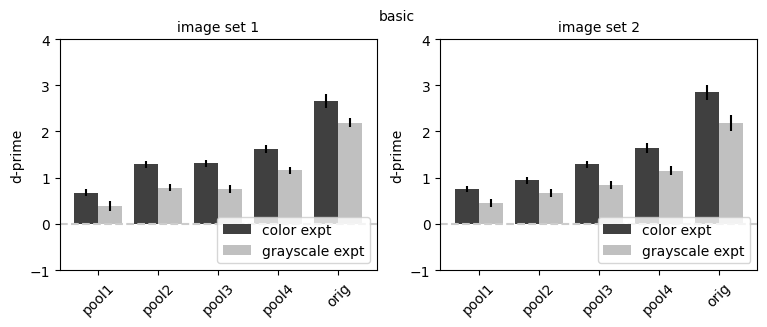

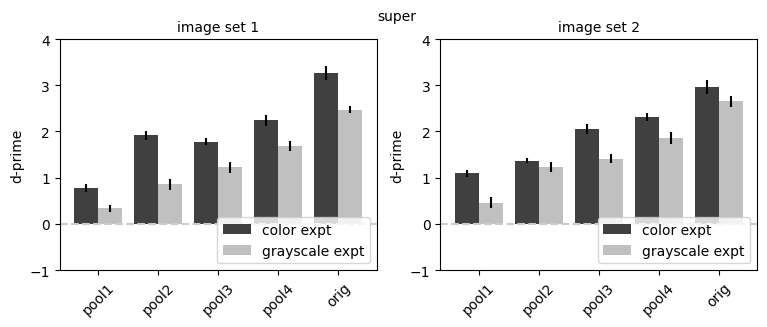

In [21]:
color_cond_colors = cm.gray(np.linspace(0,1,5))[[1,3],:]

plot_utils.set_all_font_sizes(10)

for cc, cue in enumerate(cue_level_names):

    plt.figure(figsize=(9,3))

    for cbi, cb in enumerate([1,2]):

        ax = plt.subplot(1,2,cb)
        lh = []

        for ee, [ename, dvals, svals] in enumerate(zip(['color expt','grayscale expt'], \
                                                   [dprime_by_condition1, dprime_by_condition2], \
                                                   [subject_cb1, subject_cb2])):



            subjects_plot = (svals==cbi)
            n_subs_plot = np.sum(subjects_plot)

            
            

            vals = dvals[subjects_plot,cc,:]

#                 h = plt.plot(np.arange(n_image_types)+xjitters[cc], \
#                              vals.T,\
#                              point_types[cc],color=[0.8, 0.8, 0.8], markerfacecolor='none', 
#                             markersize=markersize)
#                 lh.append(h[0])

            meanvals = np.mean(vals, axis=0)
            semvals = np.std(vals, axis=0)/np.sqrt(n_subs_plot)

            h = plt.bar(np.arange(n_image_types)+xjitters[ee], \
                             meanvals, width = barwidth, \
                        color = color_cond_colors[ee,:])
            plt.errorbar(np.arange(n_image_types)+xjitters[ee], \
                             meanvals, \
                             semvals, \
                             color='k', linestyle='none')
                            # color = color_cond_colors[ee,:])
            lh.append(h)

            plt.xticks(np.arange(n_image_types), image_type_names,rotation=45)


        plt.axhline(0, color=[0.8, 0.8, 0.8], linestyle='--')

        ax.legend(lh, ['color expt','grayscale expt'], loc='lower right')

        plt.ylabel('d-prime')

        plt.ylim([-1, 4])

        plt.title('image set %d'%(cb))
    
    plt.suptitle(cue_level_names[cc])
    

In [22]:
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols


In [23]:
var1, var2, var3 = 'cue_level','image_type','color_cond'
model_str = 'value ~ C(%s) + C(%s) + C(%s)'%(var1, var2, var3)
model_str += ' + C(%s):C(%s)'%(var1, var2)
model_str += ' + C(%s):C(%s)'%(var1, var3)
model_str += ' + C(%s):C(%s)'%(var2, var3)
model_str += ' + C(%s):C(%s):C(%s)'%(var1, var2, var3)
model_str += ' + 1'
model_str

'value ~ C(cue_level) + C(image_type) + C(color_cond) + C(cue_level):C(image_type) + C(cue_level):C(color_cond) + C(image_type):C(color_cond) + C(cue_level):C(image_type):C(color_cond) + 1'

In [25]:
a_all = []

for cbi, cb in enumerate([1,2]):
    
    atab = []

    for ee, [ename, dvals, svals] in enumerate(zip(['color expt','grayscale expt'], \
                                               [dprime_by_condition1, dprime_by_condition2], \
                                               [subject_cb1, subject_cb2])):
        
        subjects_plot = (svals==cbi)
        n_subs_plot = np.sum(subjects_plot)

        vals = dvals[subjects_plot,:,:]
        
        print(vals.shape)
        
        for cc in range(n_cue_levels):
            for ii in range(n_image_types):
                for ss in range(vals.shape[0]):
                
                    # [cue level, image type, color cond, value]
                    atab.append([cc,ii,ee,vals[ss,cc,ii]])
   
    df = pd.DataFrame(np.array(atab), columns=[var1, var2, var3,'value'])
    
    model = ols(model_str, data = df).fit()

    a = anova_lm(model)

    a_all.append(a)

(23, 2, 5)
(19, 2, 5)
(24, 2, 5)
(19, 2, 5)


In [26]:
cbi = 0;
print('Image set %d'%(cbi+1))
a_all[cbi]


Image set 1


,df,sum_sq,mean_sq,F,PR(>F)
C(cue_level),1.0,15.488072,15.488072,69.989278,1.006017e-15
C(image_type),4.0,202.026176,50.506544,228.234764,8.117526e-102
C(color_cond),1.0,34.018624,34.018624,153.727258,4.255608e-30
C(cue_level):C(image_type),4.0,3.535124,0.883781,3.993731,3.444482e-03
C(cue_level):C(color_cond),1.0,1.270973,1.270973,5.743419,1.700885e-02
C(image_type):C(color_cond),4.0,1.843642,0.460911,2.082816,8.229819e-02
C(cue_level):C(image_type):C(color_cond),4.0,1.026773,0.256693,1.159975,3.280158e-01
Residual,400.0,88.516829,0.221292,NaN,NaN


In [27]:
cbi = 1;
print('Image set %d'%(cbi+1))
a_all[cbi]


Image set 2


,df,sum_sq,mean_sq,F,PR(>F)
C(cue_level),1.0,23.050638,23.050638,86.847965,7.312118e-19
C(image_type),4.0,196.887148,49.221787,185.453088,1.450036e-90
C(color_cond),1.0,19.846899,19.846899,74.777228,1.202561e-16
C(cue_level):C(image_type),4.0,4.412157,1.103039,4.155925,2.600951e-03
C(cue_level):C(color_cond),1.0,0.000483,0.000483,0.001821,9.659817e-01
C(image_type):C(color_cond),4.0,1.477269,0.369317,1.391478,2.360688e-01
C(cue_level):C(image_type):C(color_cond),4.0,1.550500,0.387625,1.460456,2.134196e-01
Residual,410.0,108.819610,0.265414,NaN,NaN
